# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# **Importing dataset**

In [3]:
df= pd.read_csv('/content/spam.csv',encoding='latin-1')

# **EDA on the dataset**

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [6]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.shape

(5572, 5)

In [9]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

The dataset contains three unnamed columns with null values. So we drop these columns. We will rename v1 as Type and v2 as Text.

In [10]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df = df.rename(columns={'v1':'Type','v2':'Text'})

0 ----> ham data

1 ----> spam data

In [11]:
df['Type_enc']=df['Type'].map({'ham':0,'spam':1})
df.head()

,Type,Text,Type_enc
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


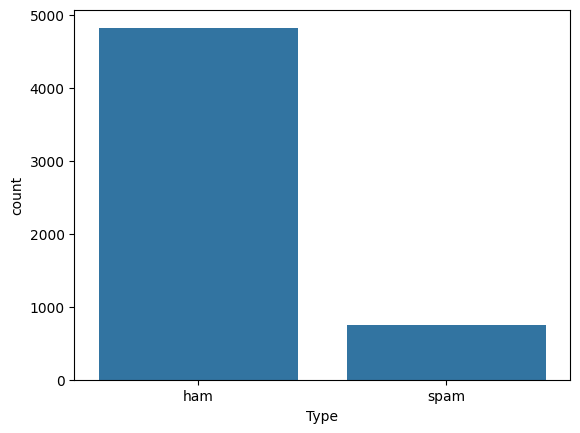

In [12]:
sns.countplot(x=df['Type'])
plt.show()

Spam data is lesser in comparison to ham data.

In [13]:
# Find average number of tokens in all sentences
avg_words_len=round(sum([len(i.split()) for i in df['Text']])/len(df['Text']))
print(avg_words_len)

15


In [14]:
# Finding Total no of unique words in corpus
s = set()
for sent in df['Text']:
  for word in sent.split():
    s.add(word)
total_words_length=len(s)
print(total_words_length)

15585


# **Train Test split on the dataset**

In [15]:
from sklearn.model_selection import train_test_split

x,y = np.asanyarray(df['Text']), np.asanyarray(df['Type_enc'])
new_df = pd.DataFrame({'Text':x, 'Type':y})
x_train, x_test, y_train,y_test = train_test_split(new_df['Text'], new_df['Type'], test_size=0.2, random_state=42)

In [16]:
x_train.shape

(4457,)

In [17]:
x_test.shape

(1115,)

In [18]:
y_train.shape

(4457,)

In [19]:
y_test.shape

(1115,)

# **Machine Learning Model**

We use MultinomialNB() model to analyse the dataset. It performs well for text classification when the features are discrete like words.

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score

In [21]:
tfidf_vec = TfidfVectorizer().fit(x_train)
x_train_vec,x_test_vec = tfidf_vec.transform(x_train),tfidf_vec.transform(x_test)

baseline_model = MultinomialNB()
baseline_model.fit(x_train_vec,y_train)

MultinomialNB()

In [22]:
accuracy = accuracy_score(y_test, baseline_model.predict(x_test_vec))
print(accuracy)

0.9623318385650225


We get an accuracy of 96% using this model.

In [23]:
print(classification_report(y_test, baseline_model.predict(x_test_vec)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(baseline_model, x_test_vec,y_test)

In [31]:
from tensorflow.keras.layers import TextVectorization

MAXTOKENS=total_words_length
OUTPUTLEN=avg_words_len

text_vector = TextVectorization(
    max_tokens=MAXTOKENS,
    standardize='lower_and_strip_punctuation',
    output_mode='int',
    output_sequence_length=OUTPUTLEN
)
text_vector.adapt(x_train)

In [35]:
sample= "This is a Machine learning model."
text_vector([sample])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  41,   10,    5,    1,    1, 1713,    0,    0,    0,    0,    0,
           0,    0,    0,    0]])>

Here we get an output of using our Machine Learning Model on a sample sentence to check wheather it is spam or not